In [3]:
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Define the path to the Gold folder
gold_path = r"C:\Users\archa\Desktop\Capstone project\Data\Gold"

# File names
files = {
    'counselchat': 'counselchat_gold.csv',
    'facebook': 'facebook_gold.csv',
    'goemotions': 'goemotions_gold.csv'
}

# Load datasets
df_counselchat = pd.read_csv(os.path.join(gold_path, files['counselchat']))
df_facebook = pd.read_csv(os.path.join(gold_path, files['facebook']))
df_goemotions = pd.read_csv(os.path.join(gold_path, files['goemotions']))

In [6]:
emotion_cols = [
    col for col in df_goemotions.columns
    if set(df_goemotions[col].dropna().unique()).issubset({0, 1})
    and df_goemotions[col].dtype in [np.int64, np.int32, np.uint8]
]

emotion_cols

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

c:\Users\archa\Desktop\Capstone project\capstone\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


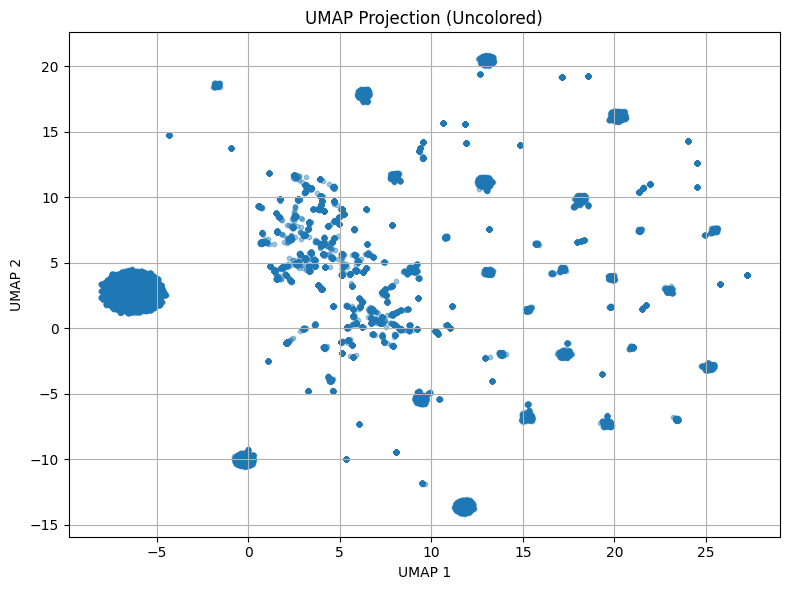

In [7]:
# Apply deterministic UMAP
umap_model = umap.UMAP(random_state=0)  # Fixed seed for consistent layout
umap_embedding = umap_model.fit_transform(df_goemotions[emotion_cols])

# Add UMAP results
df_goemotions['UMAP_1'] = umap_embedding[:, 0]
df_goemotions['UMAP_2'] = umap_embedding[:, 1]

# Plot: UMAP projection (Uncolored)
plt.figure(figsize=(8, 6))
plt.scatter(df_goemotions['UMAP_1'], df_goemotions['UMAP_2'], alpha=0.4, s=10)
plt.title("UMAP Projection (Uncolored)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

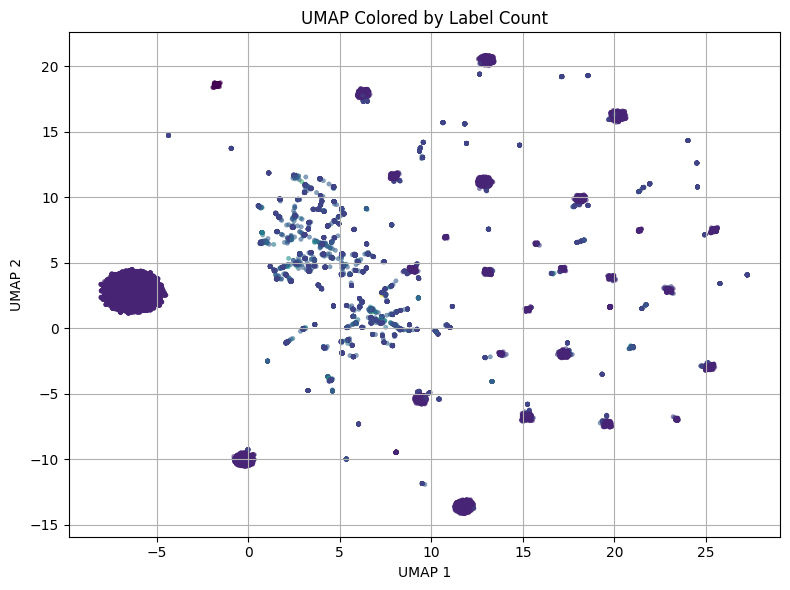

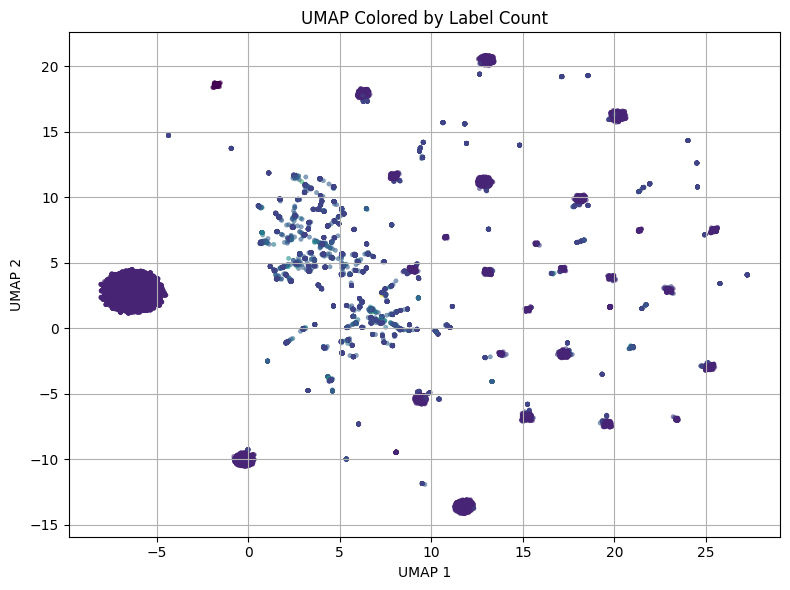

In [8]:
# Plot: UMAP projection colored by label count
df_goemotions['label_count'] = df_goemotions[emotion_cols].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='label_count',
    data=df_goemotions,
    palette='viridis',
    s=10, alpha=0.6, edgecolor=None, legend=False
)
plt.title("UMAP Colored by Label Count")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()# Plot: UMAP projection colored by label count
df_goemotions['label_count'] = df_goemotions[emotion_cols].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='label_count',
    data=df_goemotions,
    palette='viridis',
    s=10, alpha=0.6, edgecolor=None, legend=False
)
plt.title("UMAP Colored by Label Count")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Apply KMeans (k=10) on UMAP output
kmeans = KMeans(n_clusters=10, n_init=10)
df_goemotions['cluster'] = kmeans.fit_predict(umap_embedding)

# Dominant emotions per cluster
cluster_emotion_avg = df_goemotions.groupby('cluster')[emotion_cols].mean().T
dominant_emotion_by_cluster = cluster_emotion_avg.idxmax().reset_index()
dominant_emotion_by_cluster.columns = ['Cluster', 'Dominant Emotion']

from IPython.display import display

print("📌 Dominant Emotion per KMeans Cluster:")
display(dominant_emotion_by_cluster)

📌 Dominant Emotion per KMeans Cluster:


,Cluster,Dominant Emotion
0,0,amusement
1,1,neutral
2,2,disapproval
3,3,gratitude
4,4,anger
5,5,love
6,6,approval
7,7,approval
8,8,annoyance
9,9,admiration


In [12]:
# Import required modules (retrying full UMAP + t-SNE workflow)
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

C:\Users\archa\AppData\Local\Temp\ipykernel_16828\731683454.py:27: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\archa\Desktop\Capstone project\capstone\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


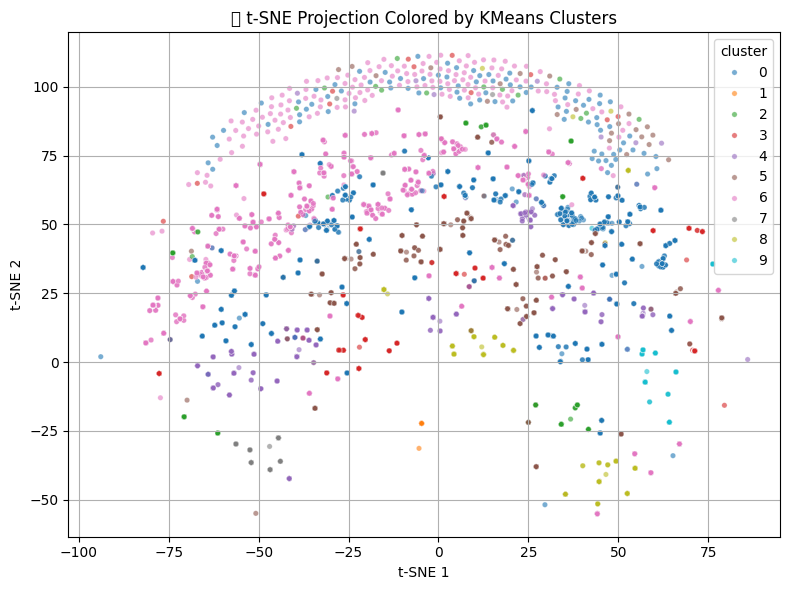

📌 Dominant Emotion per KMeans Cluster:


,Cluster,Dominant Emotion
0,0,amusement
1,1,neutral
2,2,disapproval
3,3,gratitude
4,4,anger
5,5,love
6,6,approval
7,7,approval
8,8,annoyance
9,9,admiration


In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Step 5: t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne_model.fit_transform(df_goemotions[emotion_cols])

# Add t-SNE coordinates to DataFrame
df_goemotions['tSNE_1'] = tsne_embedding[:, 0]
df_goemotions['tSNE_2'] = tsne_embedding[:, 1]

# Step 6: Visualize t-SNE clusters by KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='tSNE_1', y='tSNE_2',
    hue='cluster',
    palette='tab10',
    data=df_goemotions,
    s=15, alpha=0.6
)
plt.title("🔹 t-SNE Projection Colored by KMeans Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display dominant emotions per cluster without ace_tools
print("📌 Dominant Emotion per KMeans Cluster:")
display(dominant_emotion_by_cluster)


In [ ]:
binarization_check = df_goemotions[binary_emotion_cols].apply(lambda col: set(col.unique()).issubset({0, 1}))
valid_binarized = binarization_check.all()

# Step 3: Convert non-integer binary labels (if any) to integers
df_goemotions[binary_emotion_cols] = df_goemotions[binary_emotion_cols].astype(np.uint8)

# Display result
binary_emotion_cols, valid_binarized, df_goemotions[binary_emotion_cols].head(3)